# Homework 1

## Andrew Loeppky

### Question 1

This problem is meant as a simple warm-up exercise to give you practice in calculating some descriptive statistics. Use whatever code or software package you like to complete it.

The attached data file fakedata.out contains 200 observations of three random variable X, Y, and Z (each variable in its own column, listed in that order). Calculate the following for this data:

---

In [113]:
### package imports ###

import pandas as pd  # spreadsheet stuff
import numpy as np  # numerics
import scipy.stats as st # statistics
from matplotlib import pyplot as plt  # plotting
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# special functions
from scipy.special import factorial as fac
from scipy.special import gamma
from scipy.stats import norm

# suppress /0 errors
import warnings
warnings.filterwarnings('ignore')

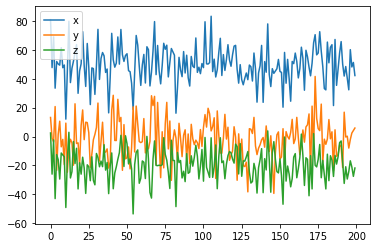

In [2]:
# get raw data
data_in = pd.read_csv("fakedata.csv", names=["x", "y", "z"], delim_whitespace=True)
# visualize each series
data_in.plot();

**A)** The mean values of X, Y, and Z

In [3]:
for item in ["x", "y", "z"]:
    print(f"Mean of {item}: {data_in[item].mean()}")

Mean of x: 49.84887676
Mean of y: -1.5561647316695
Mean of z: -19.379754898714996


**B)** The standard deviations for all three variables

In [4]:
for item in ["x", "y", "z"]:
    print(f"Standard dev of {item}: {data_in[item].std()}")

Standard dev of x: 12.782701589962043
Standard dev of y: 13.66107300434352
Standard dev of z: 11.083362465591792


**C)** The three correlation coefficients between the three variables.

In [5]:
xy = np.corrcoef(data_in["x"], data_in["y"])[1,0]
xz = np.corrcoef(data_in["x"], data_in["z"])[1,0]
yz = np.corrcoef(data_in["y"], data_in["z"])[1,0]

print(f"coeff for x and y: {xy}")
print(f"coeff for x and z: {xz}")
print(f"coeff for y and z: {yz}")

coeff for x and y: 0.30182905559990225
coeff for x and z: 0.7176841431782304
coeff for y and z: -0.29977356089932855


**D)** The skew for X, Y, and Z

skew of x: -0.0968241072662959
skew of y: 0.049884559248455584
skew of z: -0.31033681075106717


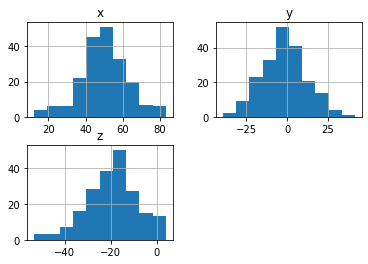

In [6]:
data_in.hist() # visualize for sanity check

for item in ["x", "y", "z"]:
    print(f"skew of {item}: {st.skew(data_in[item])}")

### Question 2

 Numerically calculate the probability that a number drawn from a chi^2 distribution with n=5 degrees of freedom will be larger than chi^2=5. Do the same for n=10. Do not use a lookup table or a pre-existing function to evaluate the answer, but calculate it for yourself as if you had just discovered the chi^2 distribution for the first time. (The point of this problem is partly to give you practice evaluating integrals numerically, so don't cheat by using Mathematica's ChiSquarePValue or any other such pre-fabricated answer.) Submit your code or equivalent documentation of how you got your answer.
 
 ---

The chi squared distribution:

$$
P(\chi^2) = \frac{2^{-N/2}}{(\frac{N}{2} -1)!}\chi^{N-2}e^{-\chi^2/2}
$$

In [7]:
def do_Q2(N, cutoff=5, res=0.01):
    """
    calculates the probability of drawing x>cutoff from a chi2 distribution
    integration is done with a right hand riemann sum
    
    IN  =================================================================
        N = degrees of freedom of chi2 distn
        cutoff = default 5, any number on 0,\inf
        res = numerical resolution. smaller numbers are higher accuracy
    OUT =================================================================
        A plot of the distribution and the integral
    """
    chi2 = np.arange(0,50,res)  # array for chi2
    above_cutoff = chi2[chi2 >= cutoff]  # select only values of chi2 above cutoff

    def p_chi2(chi2, N):
        """
        Calculates the distribution P(chi2) of an input array chi2
        """
        return (2 ** (-N / 2) / gamma(N / 2) * np.sqrt(chi2) ** (N - 2) * np.exp(-chi2/2))


    full_dist = p_chi2(chi2, N)  # create the distribution over the whole range
    high_dist = p_chi2(above_cutoff, N)  # create the distribution above cutoff

    # integrate over range <cutoff>, inf
    integral = np.sum(high_dist) * res

    # make a plot
    plt.plot(chi2, full_dist, color='k')
    plt.fill_between(above_cutoff, high_dist, 0, facecolor="red", alpha=0.3)
    plt.xlim(0,25)
    plt.xlabel("$\chi^2$")
    plt.ylabel("$P(\chi^2$)")
    plt.annotate(f"$N=$ {N}",[20, 0.9*max(full_dist)])
    plt.annotate(f"Probability that x>{cutoff}: {round(integral,4)}", [12, 0.8*max(full_dist)])

Calculate values for N=5

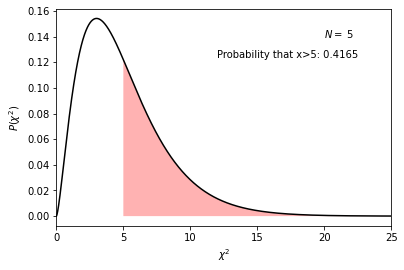

In [8]:
do_Q2(5)

Do the same for N=10

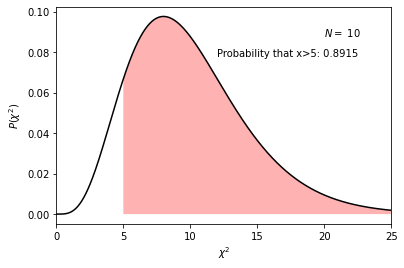

In [9]:
do_Q2(10)

### Question 3

Three independent random numbers X1 … X3 are drawn from uniform distributions with means of 0 and variances of 1/3. Let Z = the sum of these three numbers. Derive the normalized probability distribution for Z.

---


First, explicitly state $x_1, x_2, x_3$ as uniform distributions:
$$
  f(x) = \cases{        \frac{1}{b-a}       & $a \le x\le b$ \cr
                        0       & $else$ }
$$
with mean and variance
$$
\langle x\rangle = \frac{a + b}{2}, V(x) = \frac{(b-a)^2}{12}\tag{B3.25}
$$

for a mean of 0, $a=-b$, and so 

$$
V(x) = \frac{1}{3} = \frac{(2a)^2}{12}
$$

$$
a=1
$$

$$
f(x_1) = f(x_2) = f(x_3) = \cases{        \frac{1}{2}       & $-1 \le x\le 1$ \cr
                        0       & $else$ }
$$


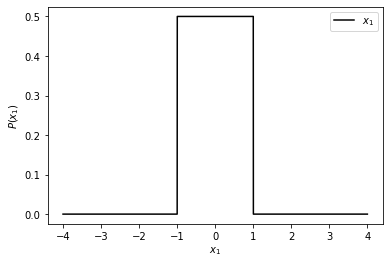

In [119]:
samp = 1e-3  # sampling frequency for numerical convolution
x = np.arange(-4,4, samp) 

# create zero-padded uniform distribution
fx = np.zeros_like(x)
fx[(x > -1) & (x < 1)] = 1 / 2

# plot it
plt.plot(x, fx, label="$x_1$", color="k")
plt.xlabel("$x_1$")
plt.ylabel("$P(x_1)$")
plt.legend();

Using: *The probability distribution of the sum of two or more independent random variables is the convolution of their individual distributions,* find the distribution for $x_1 + x_2 + x_3$

Following this tutorial for convolving a square wave with itself:
http://mikewilkes-irsc.weebly.com/uploads/2/3/1/7/23176182/rectangular_pulse_convolution-update.pdf

$$
(f\ast f)(z) = \int^\infty_{-\infty} f(u)f(z-u)du
$$

$$
(f\ast f)(z)  = \cases{        0       & $z \le -2$ \cr
                       \left(\frac{1}{2}\right)^2(z+2)       & $-2 \le z \le 0$ \cr
                       \left(\frac{1}{2}\right)^2(2-z)       & $0 \le z \le 2$ \cr
                            0       & $z \ge 2$}
$$

$$
(f\ast f)(z)  = \cases{        0       & $z \le -2$ \cr
                       \frac{z}{4}+\frac{1}{2}       & $-2 \le z \le 0$ \cr
                       \frac{1}{2}-\frac{z}{4}     & $0 \le z \le 2$ \cr
                            0       & $z \ge 2$}
$$

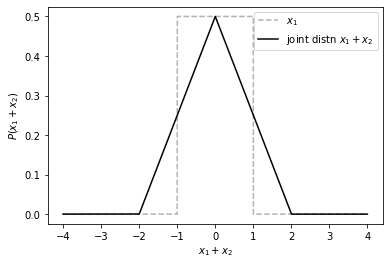

In [120]:
# convolve f(x) with itself
c1 = np.convolve(fx, fx, mode='same') * samp

# plot the result
plt.plot(x, fx, label="$x_1$", color="k", linestyle="--", alpha=0.3)
plt.plot(x, c1, label="joint distn $x_1 + x_2$", color="k")
plt.xlabel("$x_1 + x_2$")
plt.ylabel("$P(x_1 + x_2)$")
plt.legend();

repeat this process, convolving the result $c_1$ with $x_3$

$$
(c_1 \ast f)(z) = \int^\infty_{-\infty} c_1(u)f(z-u)du
$$

$$
(c_1 \ast f)(z)  = \cases{        0       & $z \le -6$ \cr
                       expression1       & $-6 \le z \le -2$ \cr
                       expression2    & $-2 \le z \le 2$ \cr
                       -expression1       & $2 \le z \le 6$ \cr
                            0       & $z \ge 6$}
$$

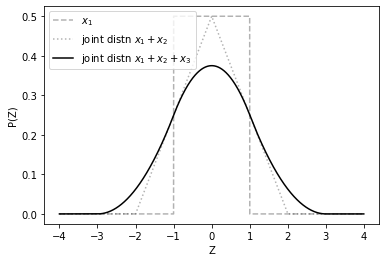

In [121]:
c2 = np.convolve(fx, c1, mode='same') * samp

# plot the result
plt.plot(x, fx, label="$x_1$", color="k", linestyle="--", alpha=0.3)
plt.plot(x, c1, label="joint distn $x_1 + x_2$", color="k", linestyle=":", alpha=0.3)
plt.plot(x, c2, label="joint distn $x_1 + x_2 + x_3$", color="k")
plt.xlabel("Z")
plt.ylabel("P(Z)")
plt.legend();

### Question 4

Suppose that two random variables $x_1$ and $x_2$ have a continuous joint distribution for which the joint PDF is as follows:

$$
f(x_1,x_2) =\cases{        4 x_1x_2       & $(0<x1<1)\space and\space (0<x2<1)$ \cr
                        0       & $otherwise$ }
$$

Now consider the change of variables $y_1 = x_1/x_2$ and $y_2 = x_1 x_2$, and let $g(y_1 ,y_2)$ be the joint PDF of these two variables. Sketch the region in the $y_1,y_2$ plane for which $g$ is non-zero, and calculate $g(y1,y2)$.

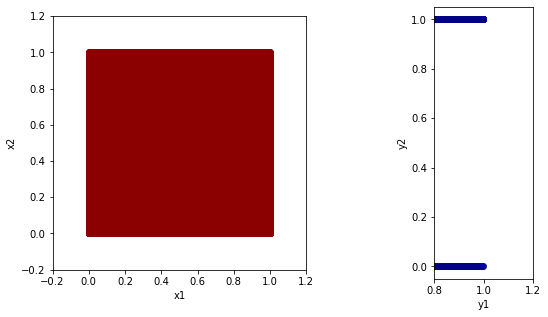

In [118]:
### Sketch the domains of x1,x2 and y1,y2 ###

# create x's
x1 = np.arange(0,1,1e-3)
x2 = np.arange(1e-10,1,1e-3)

# create y's
y1 = x1 / x2
y2 = x1 * x2

# set up plot 
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set_aspect(1)
ax[0].set_xlim(-0.2,1.2)
ax[0].set_ylim(-0.2,1.2)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")

ax[1].set_aspect(1)
ax[1].set_xlim(0.8,1.2)
ax[1].set_xlabel("y1")
ax[1].set_ylabel("y2")

# fill the plots with points
for i,j in zip(x2, y2):
    xi = np.full(len(x1),i)
    yi = np.full(len(y1),j)
    ax[0].scatter(xi,x1, color="darkred", alpha=0.5)
    ax[1].scatter(yi,y1, color="darkblue", alpha=0.5)   

### Question 5

Suppose that galactic supernovae obey Poissonian statistics. The mean number of supernovae per century is 1/3. What is the most likely date for the next supernova? What is the probability distribution for the length of the interval between now and the next galactic supernova?


---

Poisson dist'n:

$$
p(x) = \frac{e^{-\lambda} \lambda^x}{x!}\tag{G5.22}
$$

for $x\in N, \lambda>0$

$\lambda$ is the average number of occurences in a time interval; in our case $\lambda = 1/300$ supernova/year. To find the probability that the *next* supernova occurs in a particular year, consider the following cases:

**I.** supernova occurs this year (include the possibility of more than one): ($x_0 \ge 1$)

**II.** supernova occurs next year, which implies no supernova this year ($x_0=0, x_1\ge1$)

**III.** supernova in 2 years, no supernova this year or next ($x_0, x_1=0, x_2\ge1$)

**IV.** and so on... ($x_0,...x_{t-1}=0, x_t\ge1$)

The probability $P(0)$ of 0 supernovae occuring in a single year is 

$$
P(x = 0) = e^{-\lambda}
$$ 

and the probability of more than zero in a single year 

$$
P(x > 0) = (1 - e^{-\lambda})
$$

Firmly asserting that supernovae are independent of one another (they are probably *really* far apart), take $P(x_1=0 \space and\space x_2=0) = P(x=0)^2$, and obtain the probability distribution that the next supernova will occur $t$ years from now

$$
P(t) = e^{-\lambda t}(1 - e^{-\lambda})
$$

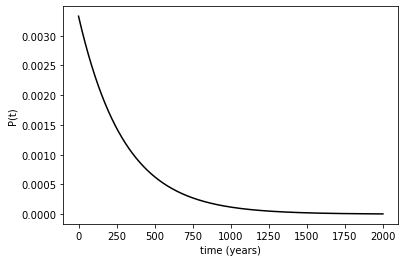

In [13]:
t = np.arange(0,2000)  # 0 to 2000 years from now
lmda = 1 / 300

pt = np.exp(-lmda * t) * (1 - np.exp(-lmda))

plt.plot(t, pt, color="k")
plt.xlabel("time (years)")
plt.ylabel("P(t)");

The *most* likely date to observe the next supernova is today. 

### Question 6

**A.** Suppose that the ATLAS experiment at CERN will publish 100 data analyses, all looking to discover new particles. If the collaboration wants to reduce the probability of publishing a false positive result to less than 1%, what probability of a false positive result should any individual analysis have? (Assume that all the analyses are statistically independent.)
 
 ---

Take each data analysis to be a coin flip with probability $p(x)$, where $x$ is a false positive result. Write as a binonial distribution:

$$
P(m|p, N) = \begin{pmatrix}
                  N \\
                  m 
            \end{pmatrix}   p^m(1-p)^{N-m}
$$

set $N=100$ studies, $m = 0$ false results (easier than doing 1, 2, 3... false results), $P = 0.99$. Solve for $p$:

$$
0.99 = \begin{pmatrix}
                  100 \\
                  0 
            \end{pmatrix}   p^0(1-p)^{100}
$$

$$
p = 1 - 0.99^\frac{1}{100} \approx \boxed{\frac{1}{10^4}}
$$

Each study should have less than a $1/10000$ chance of a false positive in order for 100 studies to have a $1/100$ chance.

**B.** If a random sample of 25 observations is taken from a normal distribution with mean m and standard deviation 2, what is the probability that the sample mean will lie within 1 unit of m?

sample mean:

$$
\bar{x}_s = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

normal distribution:

$$
p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x - \mu_x}{\sigma}\right)^2}
$$

We want to find $P((m-1) < \bar{x}_s < (m+1))$. To calculate $\sum x_i$, we can leverage the fact that the sum of gaussians is a gaussian -- ie for two gaussian variables $x_1$ and $x_2$:

$$
X = x_1 + x_2
$$

$$
\mu_X = \mu_{x_1} + \mu_{x_2} , \space\space \sigma^2_X = \sigma^2_{x_1} + \sigma^2_{x_2} 
$$

Summing $N$ independent variables taken from the same distribution yields a mean and standard deviation:

$$
\mu_X = \sum_i^N \mu_{x_i} = N\mu_{x}
$$

$$
\space\space \sigma^2_X = \sum_i^N \sigma^2_{x_i} = N\sigma^2_x
$$

averaging over $N$ measurements:

$$
\bar{x} = \frac{N\mu_x}{N} = \mu_x
$$

$$
\sigma = \frac{\sqrt{N\sigma^2_x}}{N} = \frac{\sigma_x}{\sqrt{N}}
$$

Plot a normal distribution, setting $N=25,\space \bar{x} = m$ and $\sigma = 2$ and integrate from $(m-1)$ to $(m+1)$ 

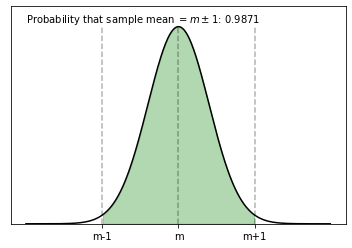

In [14]:
N = 25
sigma = 2
m = 2  # doesnt matter what this is

# create x and px arrays
res = 0.01 # integral resolution
x = np.arange(m - 2, m + 2, res)
px = norm.pdf(x, loc=m, scale=sigma / np.sqrt(N))

# do the integration numerically
integral_bounds = x[(x > m - 1) & (x < m + 1)]
integral_fcn = (px[(x > m - 1) & (x < m + 1)])
integral = sum(integral_fcn) * res

# plot it
plt.plot(x, px, color="k")
plt.vlines([m-1,m, m+1], 0, max(px), linestyles="--", color="k", alpha=0.3)
plt.fill_between(integral_bounds, integral_fcn, color="green", alpha=0.3)
plt.annotate(f"Probability that sample mean $=m\pm $1: {round(integral,4)}", [m-2, 1.02])
plt.ylim([0,1.1])
plt.xticks(ticks=[m-1, m, m+1], labels=["m-1","m","m+1"])
plt.yticks([]);